# Feature Engineering: Dimensional Reduction PCA and SVD, LDA

![title](https://www.researchgate.net/profile/Diego_Peluffo/publication/313787026/figure/fig1/AS:614307159097391@1523473648946/Dimensionality-reduction-effect-over-an-artificial-3-dimensional-spherical-shell.png)

# PCA

In [30]:
# official1
import numpy as np
from sklearn.decomposition import PCA
# 6 rows and 2 columns array
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
pca = PCA(n_components=2)
pca.fit(X)
print(X)
print(pca.transform(X))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [31]:
# official2
pca = PCA(n_components=2, svd_solver="full")
print(pca.fit_transform(X))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
[0.99244289 0.00755711]
[6.30061232 0.54980396]


# LDA

In [47]:
# scikit official2
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = np.array([[2,4],[-1,1],[5,3],[1,-4],[-3,-2],[-2,-4]])
y = np.array([1,2,1,1,2,1])
print(X)

[[ 2  4]
 [-1  1]
 [ 5  3]
 [ 1 -4]
 [-3 -2]
 [-2 -4]]


In [48]:
print(y)

[1 2 1 1 2 1]


In [50]:
clf = LDA(n_components=2)
clf.fit(X, y)
t = clf.transform(X)
print(t)

[[ 0.30733407]
 [ 1.21755352]
 [-1.82240268]
 [-1.52341474]
 [ 1.51948715]
 [ 0.30144269]]


In [51]:
print(clf.predict([[-2, -1]]))

[2]


# Comparison for PCA and LDA

In [53]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


Expressivity:  [0.92461872 0.05306648]


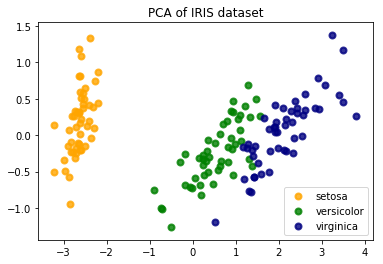

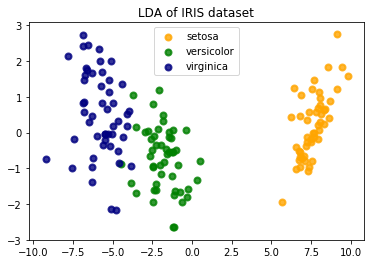

In [60]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# this metric indicates how correctly reduced dimention can describe features 
print("Expressivity: ", pca.explained_variance_ratio_)

plt.figure()
colors = ['orange', 'green', 'navy']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# SVD

Expressivity:  [0.92461872 0.05306648]


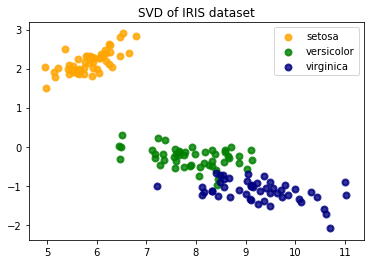

In [62]:
from sklearn.decomposition import TruncatedSVD

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

svd = TruncatedSVD(2)
X_r3 = svd.fit(X).transform(X)

# this metric indicates how correctly reduced dimention can describe features 
print("Expressivity: ", pca.explained_variance_ratio_)


colors = ['orange', 'green', 'navy']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, alpha=.8, lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SVD of IRIS dataset')

plt.show()

# Advanced Visualization for PCA

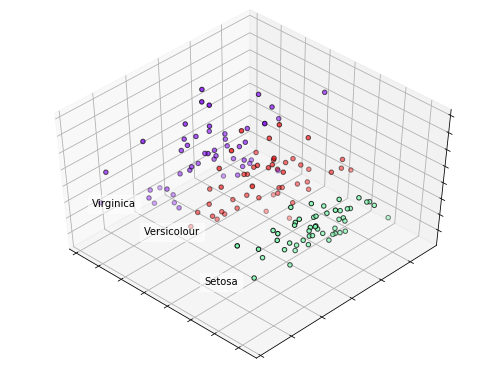

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

np.random.seed(5)

# 3×2 matrix
centers = [[1,1],[-1,-1],[1,-1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig =plt.figure(1, figsize=(7,5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()